<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B1%D0%B5%D0%B7_%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D1%8F_%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81_%D0%BF%D0%BE%D0%B4%D0%BA%D1%80%D0%B5%D0%BF%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC_%D0%A0%D0%B0%D0%B7%D0%B1%D0%BE%D1%80_%D0%B4_%D0%B7__old.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ООО "Университет Цифровых Технологий платформа 3"

# Обучение без учителя. Обучение с подкреплением. - Разбор д.з.

## Теория

Обучение с подкреплением (Reinforcement Learning) - раздел глубокого
машинного обучения, в котором некий *агент* (**agent**) обучается оптимальным образом взаимодействовать со своим *окружением*, или *средой* (**environment**). Подразумевается, что агент действует на основании данных, полученных от его нейронной сети, и обучение агента сводится к обучению этой сети. Для обучения нейронной сети агента используются не предварительно
размеченные данные, а опыт, сын ошибок трудных, накопленный агентом в ходе
взаимодействия со средой.

В качестве примеров агентов можно привести автопилоты (самолета, судна, автомобиля), программы, играющие в компьютерные игры, роботы.

Схему взаимодействия агента с окружением (средой) можно представить
следующим образом:




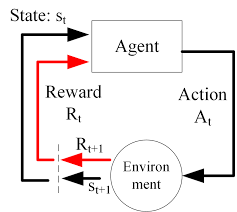

Взаимодействие агента со средой описывается следующей логической моделью (парадигмой):

Взаимодействие происходит дискретными шагами в моменты времени $t$, $t=0,1,2,...$. В начальный момент времени агент получает от среды свое *состояние* (**state**), описываемое неким вектором (или точкой) в пространстве состояний агента. На основании этих данных агент принимает решение о том, какое *действие* (**action**) ему предпринять. Действие описывается вектором в пространстве действий агента. Это пространство может быть непрерывно и многомерно, а может быть конечным дискретным набором. Среда оценивает действие $a_t$, предпринятое агентом, и на следующем временном шаге агент получает свое новое состояние $s_t$ и оценку действия на предыдущем шаге, или *награду* (**reward**) $r_t$. Получив эти данные агент выбирает новое действие, и это повторяется многократно до окончания *эпизода* (**episode**). Среда сообщает агенту об завершении эпизода с помощью флага **done**, принимающего булевы значения **True** (если эпизод завершен) и **False** в противном случае.

Цель обучения - научиться выбирать такие действия, которые максимизируют сумму наград, полученных агентом на протяжении эпизода.

Подразумевается, что агент вычисляет следующее действие $a_t$ как выход нейронной сети, которой на вход подаются состояния $s_t$.

Существует достаточно много методов и алгоритмов обучения с подкреплением,
но все они построены на общих принципах - обучение начинается с накопления
опыта, первые действия выбираются случайно и собирается информация о пространстве состояний и реакции среды. Запись собственных состояний и
действий служит базой для обучения, а оценки этих действий средой служат
метками. Таким образом, база данных собирается и “размечается”
непосредственно в процессе обучения.

Рассмотрим основные, наиболее известные алгоритмы.

### Q Learning

Этот алгоритм обучения с подкреплением можно рассматривать как некий
“нулевой” уровень. В нем даже не используются нейронные сети, агент
предпринимает действия, выбирая их из lookup-таблицы, так называемой **Q-table**.
Обучение сводится к заполнению таблицы по некоторому алгоритму на
основании полученного опыта.

Q-таблица состоит из строк, соответствующих возможным состояниям агента (подразумевается что этих состояний конечное число). Столбцы таблицы соответствуют возможным действиям (также подразумевается, что их конечное число). Ячейки таблицы содержат величины Q - оценки(предположения) о величине суммарных наград к концу эпизода.

Для выбора действия достаточно в строке таблицы, соответствующей текущему состоянию, найти столбец с максимальным значением и выбрать соответствующее действие.

В начале обучения Q-таблица содержит нулевые значения. Необученному агенту нет смысла следовать данным таблицы, поскольку она пока содержит неверные, неадекватные данные. Поэтому агент предпринимает случайные действия, изучая реакцию среды и накапливая опыт. Постепенно таблица наполняется адекватной информацией, и в конце обучения агент переходит от случайной стратегии к детерминированной, основанной на данных таблицы.

Таким образом, действия агента могут быть направленными либо на исследование среды, либо на получение максимальной суммарной награды (так называемое "жадное" поведение) Алгоритм выбора между "жадным" и случайным действием называется "эпсилон-жадная" стратегия. Его суть в следующем:

Имеется параметр $\epsilon$, который определяет вероятность выбора случайного действия. Разыгрывается случайная величина, равномерно распределенная на интервале $[0, 1]$. Если эта величина оказывается меньше $\epsilon$, то предпринимается случайное действие, а если больше - то выбираем "жадное" действие из Q-таблицы. Важно, что сама величина $\epsilon$ не постоянна, а плавно уменьшается в процессе обучения с 1 до малых величин порядка 0.01.


На каждом шаге (вне зависимости от того, был ли он выбран случайно или "жадно") корректируются значения величин Q в таблице, постепенно приближая эти значения к "истинным".

Шаг обучения сводится к коррекции (замене) величины $Q(s, a)$ на новое значение:

$$ Q(s, a) + \alpha[r + \gamma max_a Q(s', a) - Q(s, a)]$$

В этой формуле $s'$ - новое состояние, в которое агент попал из состояния $s$, выбрав действие $a$

$max_a$ - максимальное значение $Q$ в строке $s'$

$\alpha$ - гиперпараметр, задающий скорость обучения, выбираемый обычно порядка 0.1 - 0.001

$\gamma$ - еще один гиперпараметр, определяющий "дисконт" будущих наград. (Считается что награда "сейчас" более ценна, чем награда "потом"). Обычно выбирается в районе 0.95 - 0.99

Поясним формулу для шага обучения. По определению величин $Q$ должно выполняться равенство (называемое уравнением Беллмана):

$$ Q(s, a) = r +  max_a Q(s', a)$$

ибо величина $Q$ равна сумме вознаграждений до конца эпизода, а состояние $s'$ на один шаг ближе к концу эпизода. Но на практике равенство не выполняется, так как на этапе обучения данные неточны. Для уточнения данных мы постепенно и плавно заменяем старые значения $Q(s, a)$ на новые, используя параметр $\alpha$:

$$ (1 - \alpha)Q(s, a) + \alpha[r + max_a Q(s', a)] $$

Нетрудно видеть, что эта запись эквивалентна приведенной выше ( не считая параметра $\gamma$)

Данный алгоритм годится только для очень простых, “игрушечных” задач с
небольшим количеством состояний и небольшим дискретным набором возможных
действий. Это связано с тем, что размер Q таблицы очень быстро растет с
увеличением сложности модели и исследование всех возможных состояний
становится невозможным в разумное время.

### Deep Q Learning

Этот алгоритм является усовершенствованием предыдущего, в нем Q-таблица
заменяется на нейронную сеть.



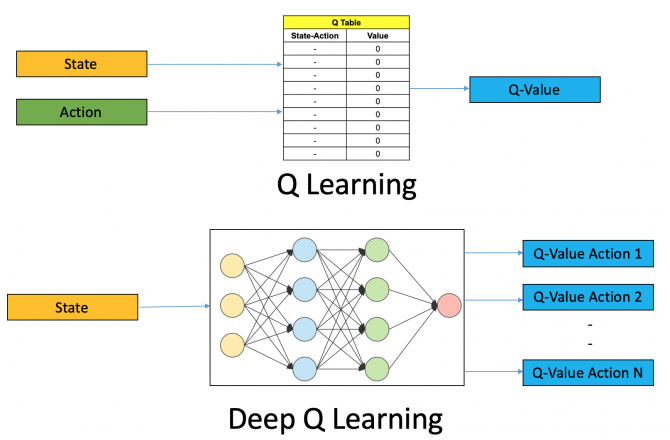

На вход сети подается текущее состояние $s$, на выходе - вектор размерности пространства действий, состоящий из величин $Q$ для каждого действия.

Как и в случае Q Learning, используется эпсилон-жадная стратегия - 
либо выбирается действие с максимальной величиной Q (так называемое “жадное”
поведение), либо продолжается исследование среды путем выбора случайного действия.
На начальных этапах обучения выбираются случайные действия, так как сеть еще
не умеет с достаточной точностью предсказывать последствия действий. По мере
обучения можно начинать действовать по рекомендациям сети.

В качестве функции потерь используется квадрат разности между старым (предыдущем) значением величины $Q(s, a)$ и новым, уточненным значением, следующим из того, что 
$Q(s, a)$ должен быть равен $r + \gamma max_a Q(s', a)$

Алгоритм также не лишен недостатков - для него характерно обучение с резкими
“провалами памяти”, когда модель хорошо обучается а потом вдруг резко
забывает все, чему научилась. Еще один недостаток - алгоритм годится только
для сред с дискретным набором действий.

К настоящему времени разработано несколько усовершенствованных версий
алгоритма, призванных устранить “провалы памяти”.

Мы рассмотрим базовое усовершенствование "наивного", как его называют, исходного алгоритма Deep Q Learning. Оно было предложено в работе [Human-level control through deep reinforcement
learning](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf)

Предложено 2 усовершенствования:

1. Использования буфера воспроизведения опыта ('replay buffer')
2. Использование второй сети для оценки целевых значений.

Буфер опыта содержит историю обучения, а именно последовательность значений $ (s, a, r, s')$
Для шага обучения берется батч случайно выбранных записей из буфера. В первоначальном варианте для обучения использовалось единственная запись $ (s, a, r, s')$ последнего действия

Вторая нейронная сеть является "замороженной" копией первой. Эта сеть служит для определения целевых значений величин $Q$. Таким образом целевые значения фиксируются на некоторый промежуток времени. Периодически веса этой сети синхронизируются с весами обучаемой сети.

Следует упомянуть дальнейшие усовершенствования алгоритма, например [Deep Reinforcement Learning with Double Q-learning](https://arxiv.org/pdf/1509.06461.pdf) и [Dueling Network Architectures for Deep Reinforcement Learning](https://arxiv.org/pdf/1511.06581.pdf), однако их рассмотрение выходит за рамки курса.

### Policy Gradient

Данный алгоритм использует совершенно другой подход, в нем нейронная сеть
получает на вход состояние и выдает policy - распределение вероятностей
принятия того или иного действия. Агенту следует разыграть случайную величину
в соответствии с полученным распределением, получить действие и передать его
в среду. Так сеть работает в режиме предсказания действия.

В режиме обучения используется несколько модифицированная сеть - она
использует те же слои и те же веса, что и “рабочая” сеть, но имеет
дополнительный вход для подачи величины advantage, которая представляет
собой сумму дисконтированных наград, полученных в ответ на действия,
предпринятые в прошлом в этом состоянии. Обучение происходит на данных о
прошлых шагах, которые агент запоминает и использует для обучения. Обучение
проводится после завершения каждого эпизода, либо, как вариант, после N
эпизодов. В качестве функции потерь используется кастомная функция -
произведение логарифма вероятности действия на суммарную дисконтированную
величину reward (т.е. advantage). Фактически в качестве потери используется
математическое ожидание суммарной награды, получаемой к концу эпизода,
взятое со знаком минус. Градиентный спуск ищет локальные минимум этой
величины по отношению к весам сети, т.е. локальный максимум суммарной
награды. Таким образом оптимизируется стратегия агента - стремление к
максимальной конечной сумме награды.


Преимуществом алгоритма Policy Gradient является возможность его
использования в задачах с непрерывным пространством действий, где не
применим алгоритм Deep Q Learning.

Недостатками являются медленная сходимость и потенциальная возможность
свалиться в процессе обучения в локальный минимум, не являющийся
оптимальной политикой.

Deep Q Learning и Policy Gradient можно рассматривать как основные базовые
алгоритмы. Предложено ряд усовершенствований для этих алгоритмов.

### Actor Critic

Метод, объединяющий Deep Q Learning и Policy Gradient. Краткое изложение идеи подхода.

Данный подход является некоторой комбинацией базовых алгоритмов. Для
выработки стратегии используются сразу две сети, называемых actor и critic.
Первая сеть (actor) выдает политику π (At
,,), т.е. распределение вероятностей
принятия различных действий в данном состоянии s. Вторая сеть (critic)
оценивает успешность предлагаемых актером действий, пытаясь предсказать
конечный результат (суммарный reward к концу эпизода). Данные критика
используются при обучении актера, и в то же время критик обучается правильной
оценке на данных актера. Сеть критика похожа на сеть алгоритма Policy Gradient,
сеть критика - на сеть алгоритма Deep Q Learning.


### Классификация методов обучения с подкреплением.

Ниже приведена довольно полная иерархическая схема методов обучения с подкреплением. На самом верхнем уровне методы делятся на основанные на модели среды (Model-Based) и на не использующие модель среды (Model-Free)

Мы будем рассматривать Model-Free методы, не требующие моделирования среды (что далеко не всегда возможно). Эти методы, в свою очередь, делятся на методы оптимизации стратегии (Policy Optimization) и методы оценки ценности состояний и действий (Q-Learning)

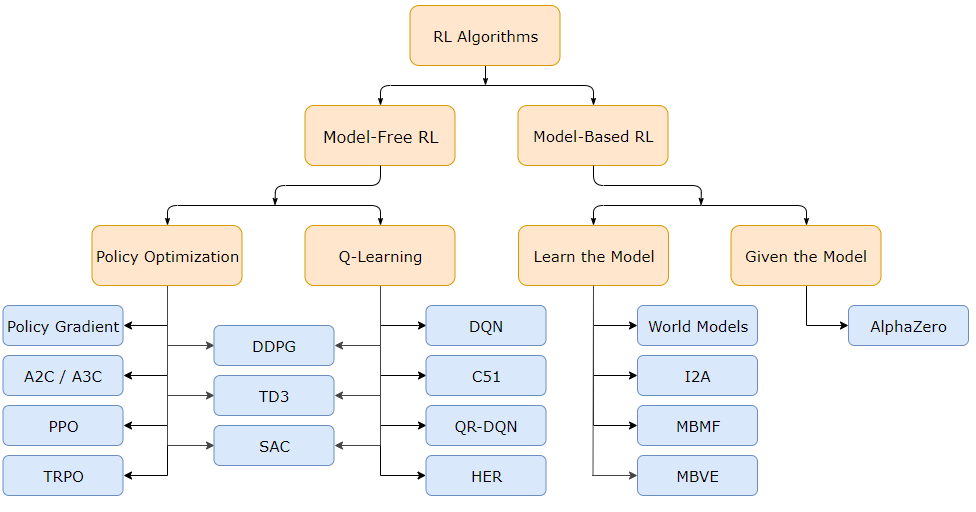

### OpenAI Gym

Для тестирования и корректного сравнения методов и алгоритмов обучения с
подкреплением важно иметь некоторую стандартную среду и набор стандартных
задач. До появления такой “экосистемы” исследователи сталкивались с тем, что
зачастую не могли воспроизвести результаты друг друга, было сложно сравнивать
эффективность алгоритмов, если они тестировались отдельно друг от друга на
разных задачах. С целью решения этих проблем компания OpenAI создала тулкит
[OpenAI Gym](https://gym.openai.com), состоящий их наборов “стандартных” задач, на которых можно
отрабатывать и сравнивать алгоритмы RL.

Кроме среды Gym, ставшей стандартом де-факто для исследований по
Reinforcement Learning, существует ряд других платформ с аналогичными
функциями. Например, DeepMind Lab, ViZDoom. Однако мы ограничимся средой Gym.


Все задачи (“среды”) функционируют по единым простым правилам. Можно
создавать свои приложения-задачи и приложения-агенты, работающие по
правилам Gym.

Правила довольно просты, все взаимодействие агента со средой сводится к
вызову 4-х методов среды. Но вначале агент должен создать экземпляр
окружения (среды), с которой будет взаимодействовать. Это делается вызовом:

`env = gym.make('CartPole-v0')`

(указывается имя нужной задачи, в данном примере - CartPole-v0)

Для начала эпизода делается сброс среды и агент получает свое начальное
состояние:

`observation = env.reset()`

Для отрисовки состояния применяется метод render():

`env.render()`

Агент сообщает о своем действии вызовом метода step():

`observation, reward, done, info = env.step(action)`

В ответ получает от среды новое состояние (observation), награду (reward), и
булеву переменную done, означающую конец эпизода, если True. Переменная info
может содержать дополнительную информацию, например для отладки.

Gym достаточно хорошо документирован и позволяет создавать собственные
задачи-среды.


## Q Learning - практика

Рассмотрим метод Q learning на примере Gym-приложения Frozen Lake

In [ ]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Инкапсулируем логику Q Learning в класс Agent. Этот класс не зависит от конкретного приложения и может быть использован повторно. В нем реализована "эпсилон-жадная" стратегия.

In [ ]:
class Agent():
    def __init__(self, lr, gamma, n_actions, n_states, eps_start, eps_end, eps_dec):
        self.lr = lr
        self.gamma = gamma
        self.n_actions = n_actions
        self.n_states = n_states
        self.epsilon = eps_start  # параметры эпсилон-жадной стратегии
        self.eps_min = eps_end
        self.eps_dec = eps_dec

        self.Q = {}     # Инициализируем Q-таблицу как словарь, заполняем ее нулями.
                        # Ключ в словаре - это кортеж (состояние, действие), значение - величина Q. 
        self.init_Q()

    def init_Q(self):
        for state in range(self.n_states):
            for action in range(self.n_actions):
                self.Q[(state, action)] = 0.0

    def choose_action(self, state):  # Реализуем эпсилон-жадную стратегию (см. выше)
        if np.random.random() < self.epsilon:
            action = np.random.choice([i for i in range(self.n_actions)])
        else:
            actions = np.array([self.Q[(state, a)] for a in range(self.n_actions)])
            action = np.argmax(actions)
        return action

    def decrement_epsilon(self):
        self.epsilon = self.epsilon*self.eps_dec if self.epsilon>self.eps_min else self.eps_min

    def learn(self, state, action, reward, state_):  # коррекция значения Q на каждом шаге
        actions = np.array([self.Q[(state_, a)] for a in range(self.n_actions)])
        a_max = np.argmax(actions)
        self.Q[(state, action)] += self.lr*(reward + self.gamma*self.Q[(state_, a_max)] - self.Q[(state, action)])
        self.decrement_epsilon()  # уменьшаем эпсилон на каждом шаге пока не достигнем его минимального уровня.


Рассмотрим работу алгоритма Q-Learning на примере задачи [FrozenLake-v0](https://gym.openai.com/envs/FrozenLake-v0/)

In [ ]:
%%time
# создаем экземпляр окружения
env = gym.make('FrozenLake-v0')
# создаем экземпляр агента
agent = Agent(lr=0.001, gamma=0.9, eps_start=1.0, eps_end=0.01,
                eps_dec=0.9999995, n_actions=4, n_states=16)

scores = []
win_pct_list = []
n_games = 500000

for i in range(n_games):
    done = False
    observation = env.reset()
    score = 0
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        agent.learn(observation, action, reward, observation_)
        score += reward
        observation = observation_
    scores.append(score)
    if i % 100 == 0:
        win_pct = np.mean(scores[-100:])
        win_pct_list.append(win_pct)
        if i % 1000 == 0:
            print('episode ', i, 'win pct %.2f' % win_pct,
                    'epsilon %.2f' % agent.epsilon)

episode  0 win pct 0.00 epsilon 1.00
episode  1000 win pct 0.04 epsilon 1.00
episode  2000 win pct 0.00 epsilon 0.99
episode  3000 win pct 0.01 epsilon 0.99
episode  4000 win pct 0.02 epsilon 0.98
episode  5000 win pct 0.01 epsilon 0.98
episode  6000 win pct 0.00 epsilon 0.98
episode  7000 win pct 0.00 epsilon 0.97
episode  8000 win pct 0.02 epsilon 0.97
episode  9000 win pct 0.02 epsilon 0.97
episode  10000 win pct 0.02 epsilon 0.96
episode  11000 win pct 0.02 epsilon 0.96
episode  12000 win pct 0.02 epsilon 0.95
episode  13000 win pct 0.01 epsilon 0.95
episode  14000 win pct 0.02 epsilon 0.95
episode  15000 win pct 0.01 epsilon 0.94
episode  16000 win pct 0.01 epsilon 0.94
episode  17000 win pct 0.02 epsilon 0.94
episode  18000 win pct 0.01 epsilon 0.93
episode  19000 win pct 0.03 epsilon 0.93
episode  20000 win pct 0.01 epsilon 0.93
episode  21000 win pct 0.03 epsilon 0.92
episode  22000 win pct 0.00 epsilon 0.92
episode  23000 win pct 0.01 epsilon 0.91
episode  24000 win pct 0.01 e

Выведем график обучения. По оси y отложена вероятность что агент доберется до конечной точки.

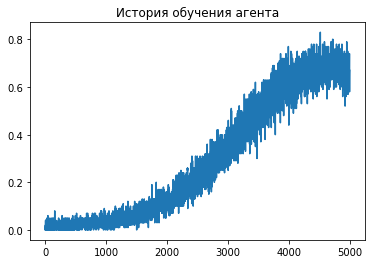

In [ ]:
plt.plot(win_pct_list)
plt.title("История обучения агента")
plt.show()

## Deep Q Learning - практика

Рассмотрим простейший ("наивный") перенос алгоритма Q Learning на нейронную сеть на примере задачи [CartPole-v1](https://gym.openai.com/envs/CartPole-v1/)

Стержень (pole) укреплен на шарнире на тележке, которая может двигаться влево-вправо. Стержень стартует с вертикального положения. Задача агента - двигая тележку влево-вправо, удерживать стержень от падения. На каждом шаге награда равна 1, если стержень остается в вертикальном положении (отклонение от вертикали не превышает 15 градусов) и тележка не сдвинулась более чем на 2.4 единицы от центра. Эпизод завершается, если стержень падает или он удерживался 200 шагов. 

Задача считается решенной, если средний результат за 100 последовательных попыток превосходит 195.


Пространство состояний непрерывно и имеет размерность 4, поэтому табличный метод не применим.

```
Observation:
        Type: Box(4)
        Num     Observation               Min                     Max
        0       Cart Position             -4.8                    4.8
        1       Cart Velocity             -Inf                    Inf
        2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
        3       Pole Angular Velocity     -Inf                    Inf
    Actions:
        Type: Discrete(2)
        Num   Action
        0     Push cart to the left
        1     Push cart to the right
```



Заменим Q-таблицу полнсвязной нейронной сетью. На вход подаем состояние, на выходе - оценки значения Q для каждого возможного действия.

In [ ]:
import os
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import gym

Класс, представляющий собой полносвязную нейронную сеть. На вход подается состояние агента, сеть возвращает обновленные оценки значения Q для каждого действия.

In [ ]:
class LinearDeepQNetwork(nn.Module):
    def __init__(self, lr, n_actions, input_dims):
        super(LinearDeepQNetwork, self).__init__()

        self.fc1 = nn.Linear(*input_dims, 128)
        self.fc2 = nn.Linear(128, n_actions)

        self.optimizer = optim.Adam(self.parameters(), lr=lr)
        self.loss = nn.MSELoss()
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.to(self.device)

    def forward(self, state):
        layer1 = F.relu(self.fc1(state))
        actions = self.fc2(layer1)

        return actions

Класс агента, реализующий "наивный" перенос алгоритма Q-learning на нейронную сеть.

In [ ]:
class Agent():
    def __init__(self, input_dims, n_actions, lr, gamma=0.99,
                 epsilon=1.0, eps_dec=1e-5, eps_min=0.01):
        self.lr = lr
        self.input_dims = input_dims
        self.n_actions = n_actions
        self.gamma = gamma
        self.epsilon = epsilon
        self.eps_dec = eps_dec
        self.eps_min = eps_min
        self.action_space = [i for i in range(self.n_actions)]

        self.Q = LinearDeepQNetwork(self.lr, self.n_actions, self.input_dims)

    def choose_action(self, observation):
        if np.random.random() > self.epsilon:
            state = T.tensor(observation, dtype=T.float).to(self.Q.device)
            actions = self.Q.forward(state)
            action = T.argmax(actions).item()
        else:
            action = np.random.choice(self.action_space)

        return action

    def decrement_epsilon(self):
        self.epsilon = self.epsilon - self.eps_dec \
                        if self.epsilon > self.eps_min else self.eps_min

    def learn(self, state, action, reward, state_):
        self.Q.optimizer.zero_grad()
        states = T.tensor(state, dtype=T.float).to(self.Q.device)
        actions = T.tensor(action).to(self.Q.device)
        rewards = T.tensor(reward).to(self.Q.device)
        states_ = T.tensor(state_, dtype=T.float).to(self.Q.device)

        q_pred = self.Q.forward(states)[actions]

        q_next = self.Q.forward(states_).max()

        q_target = rewards + self.gamma*q_next

        loss = self.Q.loss(q_target, q_pred).to(self.Q.device)
        loss.backward()
        self.Q.optimizer.step()
        self.decrement_epsilon()


In [ ]:
%%time
env = gym.make('CartPole-v1')
n_games = 10000
scores = []
eps_history = []

agent = Agent(lr=0.0001, input_dims=env.observation_space.shape,
                n_actions=env.action_space.n)

for i in range(n_games):
    score = 0
    done = False
    obs = env.reset()

    while not done:
        # env.render()
        action = agent.choose_action(obs)
        obs_, reward, done, info = env.step(action)
        score += reward
        agent.learn(obs, action, reward, obs_)
        obs = obs_
    scores.append(score)
    eps_history.append(agent.epsilon)

    if i % 100 == 0:
        avg_score = np.mean(scores[-100:])
        print('episode ', i, 'score %.1f avg score %.1f epsilon %.2f' %
                (score, avg_score, agent.epsilon))
# filename = 'cartpole_naive_dqn.png'
# x = [i+1 for i in range(n_games)]


episode  0 score 15.0 avg score 15.0 epsilon 1.00
episode  100 score 20.0 avg score 22.5 epsilon 0.98
episode  200 score 31.0 avg score 21.7 epsilon 0.96
episode  300 score 14.0 avg score 19.8 epsilon 0.94
episode  400 score 22.0 avg score 20.9 epsilon 0.91
episode  500 score 16.0 avg score 23.7 epsilon 0.89
episode  600 score 22.0 avg score 22.4 epsilon 0.87
episode  700 score 43.0 avg score 23.6 epsilon 0.85
episode  800 score 19.0 avg score 24.4 epsilon 0.82
episode  900 score 35.0 avg score 25.3 epsilon 0.80
episode  1000 score 56.0 avg score 23.3 epsilon 0.77
episode  1100 score 22.0 avg score 22.6 epsilon 0.75
episode  1200 score 9.0 avg score 21.0 epsilon 0.73
episode  1300 score 22.0 avg score 26.2 epsilon 0.70
episode  1400 score 16.0 avg score 27.2 epsilon 0.68
episode  1500 score 12.0 avg score 29.5 epsilon 0.65
episode  1600 score 14.0 avg score 23.1 epsilon 0.62
episode  1700 score 39.0 avg score 29.6 epsilon 0.59
episode  1800 score 24.0 avg score 26.5 epsilon 0.57
episod

In [ ]:
def plot_learning_curve(x, scores, epsilons, filename):
    fig = plt.figure()
    ax = fig.add_subplot(111, label="1")
    ax2 = fig.add_subplot(111, label="2", frame_on=False)

    ax.plot(x, epsilons, color="C0")
    ax.set_xlabel("Training Steps", color="C0")
    ax.set_ylabel("Epsilon", color="C0")
    ax.tick_params(axis='x', colors="C0")
    ax.tick_params(axis='y', colors="C0")

    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
        running_avg[t] = np.mean(scores[max(0, t-100):(t+1)])

    ax2.scatter(x, running_avg, color="C1")
    ax2.axes.get_xaxis().set_visible(False)
    ax2.yaxis.tick_right()
    ax2.set_ylabel('Score', color="C1")
    ax2.yaxis.set_label_position('right')
    ax2.tick_params(axis='y', colors="C1")

    plt.savefig(filename)

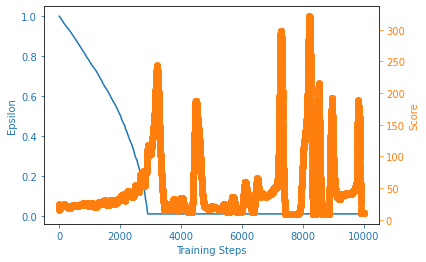

In [ ]:
filename = 'cartpole_naive_dqn.png'
x = [i+1 for i in range(n_games)]
plot_learning_curve(x, scores, eps_history, filename)

## Deep Q Learning - улучшенный вариант

Модифицировать предыдуший подход, добавив буфер истории и вторую нейронную сеть. Пояснить, что это дало.

Добавим класс, реализующий буфер опыта. На каждом шаге он будет пополняться новыми данными. Для обучения из буфера будут случайным образом выбираться данные в заданном количестве (размере батча)

In [ ]:
class ReplayBuffer(object):
    def __init__(self, max_size, input_shape, n_actions):
        self.mem_size = max_size
        self.mem_cntr = 0
        self.state_memory = np.zeros((self.mem_size, *input_shape),
                                     dtype=np.float32)
        self.new_state_memory = np.zeros((self.mem_size, *input_shape),
                                         dtype=np.float32)

        self.action_memory = np.zeros(self.mem_size, dtype=np.int64)
        self.reward_memory = np.zeros(self.mem_size, dtype=np.float32)
        self.terminal_memory = np.zeros(self.mem_size, dtype=np.bool)

    def store_transition(self, state, action, reward, state_, done):
        index = self.mem_cntr % self.mem_size
        self.state_memory[index] = state
        self.new_state_memory[index] = state_
        self.action_memory[index] = action
        self.reward_memory[index] = reward
        self.terminal_memory[index] = done
        self.mem_cntr += 1

    def sample_buffer(self, batch_size):
        max_mem = min(self.mem_cntr, self.mem_size)
        batch = np.random.choice(max_mem, batch_size, replace=False)

        states = self.state_memory[batch]
        actions = self.action_memory[batch]
        rewards = self.reward_memory[batch]
        states_ = self.new_state_memory[batch]
        terminal = self.terminal_memory[batch]

        return states, actions, rewards, states_, terminal

In [ ]:
class DeepQNetwork(nn.Module):
    def __init__(self, lr, n_actions, name, input_dims, chkpt_dir):
        super(DeepQNetwork, self).__init__()
        self.checkpoint_dir = chkpt_dir
        self.checkpoint_file = os.path.join(self.checkpoint_dir, name)

        self.fc1 = nn.Linear(*input_dims, 512)
        self.fc2 = nn.Linear(512, n_actions)

        self.optimizer = optim.Adam(self.parameters(), lr=lr)
        self.loss = nn.MSELoss()
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.to(self.device)

    def forward(self, state):
        layer1 = F.relu(self.fc1(state))
        actions = self.fc2(layer1)

        return actions

    def save_checkpoint(self):
        print('... saving checkpoint ...')
        T.save(self.state_dict(), self.checkpoint_file)

    def load_checkpoint(self):
        print('... loading checkpoint ...')
        self.load_state_dict(T.load(self.checkpoint_file))

In [ ]:
class DQNAgent(object):
    def __init__(self, gamma, epsilon, lr, n_actions, input_dims,
                 mem_size, batch_size, eps_min=0.01, eps_dec=1e-5,
                 replace=1000, algo=None, env_name=None, chkpt_dir='models/dqn'):
        self.gamma = gamma
        self.epsilon = epsilon
        self.lr = lr
        self.n_actions = n_actions
        self.input_dims = input_dims
        self.batch_size = batch_size
        self.eps_min = eps_min
        self.eps_dec = eps_dec
        self.replace_target_cnt = replace
        self.algo = algo
        self.env_name = env_name
        self.chkpt_dir = chkpt_dir
        self.action_space = [i for i in range(n_actions)]
        self.learn_step_counter = 0

        self.memory = ReplayBuffer(mem_size, input_dims, n_actions)

        self.q_eval = DeepQNetwork(self.lr, self.n_actions,
                                    input_dims=self.input_dims,
                                    name=self.env_name+'_'+self.algo+'_q_eval',
                                    chkpt_dir=self.chkpt_dir)

        self.q_next = DeepQNetwork(self.lr, self.n_actions,
                                    input_dims=self.input_dims,
                                    name=self.env_name+'_'+self.algo+'_q_next',
                                    chkpt_dir=self.chkpt_dir)

    def choose_action(self, observation):
        if np.random.random() > self.epsilon:
            state = T.tensor([observation],dtype=T.float).to(self.q_eval.device)
            actions = self.q_eval.forward(state)
            action = T.argmax(actions).item()
        else:
            action = np.random.choice(self.action_space)

        return action

    def store_transition(self, state, action, reward, state_, done):
        self.memory.store_transition(state, action, reward, state_, done)

    def sample_memory(self):
        state, action, reward, new_state, done = \
                                self.memory.sample_buffer(self.batch_size)

        states = T.tensor(state).to(self.q_eval.device)
        rewards = T.tensor(reward).to(self.q_eval.device)
        dones = T.tensor(done).to(self.q_eval.device)
        actions = T.tensor(action).to(self.q_eval.device)
        states_ = T.tensor(new_state).to(self.q_eval.device)

        return states, actions, rewards, states_, dones

    def replace_target_network(self):
        if self.learn_step_counter % self.replace_target_cnt == 0:
            self.q_next.load_state_dict(self.q_eval.state_dict())

    def decrement_epsilon(self):
        self.epsilon = self.epsilon - self.eps_dec \
                           if self.epsilon > self.eps_min else self.eps_min

    def save_models(self):
        self.q_eval.save_checkpoint()
        self.q_next.save_checkpoint()

    def load_models(self):
        self.q_eval.load_checkpoint()
        self.q_next.load_checkpoint()

    def learn(self):
        if self.memory.mem_cntr < self.batch_size:
            return

        self.q_eval.optimizer.zero_grad()

        self.replace_target_network()

        states, actions, rewards, states_, dones = self.sample_memory()
        indices = np.arange(self.batch_size)

        q_pred = self.q_eval.forward(states)[indices, actions]
        q_next = self.q_next.forward(states_).max(dim=1)[0]

        q_next[dones] = 0.0
        q_target = rewards + self.gamma*q_next

        loss = self.q_eval.loss(q_target, q_pred).to(self.q_eval.device)
        loss.backward()
        self.q_eval.optimizer.step()
        self.learn_step_counter += 1

        self.decrement_epsilon()

Повторим решение той же задачи усовершенствованным алгоритмом:

In [ ]:
%%time
env = gym.make('CartPole-v1')
n_games = 2200
scores = []
eps_history = []

agent = DQNAgent(gamma=0.99, epsilon=1., lr=0.0001, input_dims=env.observation_space.shape,
                n_actions=env.action_space.n, mem_size=10000, batch_size=32, env_name='CartPole-v1', algo='DQNAgent')

for i in range(n_games):
    score = 0
    done = False
    obs = env.reset()

    while not done:
        # env.render()
        action = agent.choose_action(obs)
        obs_, reward, done, info = env.step(action)
        score += reward
        agent.store_transition(obs, action, reward, obs_, int(done))
        agent.learn()
        obs = obs_
    scores.append(score)
    eps_history.append(agent.epsilon)

    if (i + 1) % 100 == 0:
        avg_score = np.mean(scores[-100:])
        print('episode ', i + 1, 'score %.1f avg score %.1f epsilon %.2f' %
                (score, avg_score, agent.epsilon))

episode  100 score 14.0 avg score 21.4 epsilon 0.98
episode  200 score 16.0 avg score 22.3 epsilon 0.96
episode  300 score 29.0 avg score 26.6 epsilon 0.93
episode  400 score 27.0 avg score 25.0 epsilon 0.91
episode  500 score 46.0 avg score 26.2 epsilon 0.88
episode  600 score 15.0 avg score 29.0 epsilon 0.85
episode  700 score 11.0 avg score 33.9 epsilon 0.82
episode  800 score 144.0 avg score 33.9 epsilon 0.78
episode  900 score 97.0 avg score 44.3 epsilon 0.74
episode  1000 score 55.0 avg score 47.6 epsilon 0.69
episode  1100 score 151.0 avg score 58.9 epsilon 0.63
episode  1200 score 18.0 avg score 92.0 epsilon 0.54
episode  1300 score 192.0 avg score 168.1 epsilon 0.37
episode  1400 score 329.0 avg score 305.9 epsilon 0.07
episode  1500 score 277.0 avg score 300.5 epsilon 0.01
episode  1600 score 227.0 avg score 255.7 epsilon 0.01
episode  1700 score 225.0 avg score 234.0 epsilon 0.01
episode  1800 score 370.0 avg score 263.8 epsilon 0.01
episode  1900 score 217.0 avg score 369.0

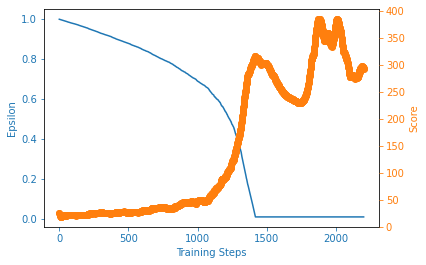

In [ ]:
filename = 'cartpole_dqn.png'
x = [i+1 for i in range(len(scores))]
plot_learning_curve(x, scores, eps_history, filename)

Проверим качество обучения - получим средний счет за 100 эпизодов:

In [ ]:
%%time
env = gym.make('CartPole-v1')
total = 0
for i in range(100):
    done = False
    obs = env.reset()
    score = 0
    while not done:
        action = agent.choose_action(obs)
        obs, reward, done, info = env.step(action)
        score += reward
    total += score
print("Average score=%.3f" % (total/100))

Average score=227.390
CPU times: user 4.4 s, sys: 0 ns, total: 4.4 s
Wall time: 4.4 s


За счет усовершенствований алгоритма удалось выйти на максимальный результат за более короткое обучение.

## Policy Gradient - практика

Это - "классический" вариант алгоритма (еще он называется "reinforce")

Применим этот метод все к той же задаче `CartPole-v1`

Нейронная сеть будет принимать на вход текущее состояние агента и выдавать вероятности принятия того или иного действия (точнее, на выходе будут _логиты_, или логарифмы вероятностей. Для получения вероятностей к набору логитов нужно применить функцию `softmax()`)

In [ ]:
class PolicyNetwork(nn.Module):
    def __init__(self, ALPHA, input_dims, fc1_dims, n_actions):
        super(PolicyNetwork, self).__init__()
        self.input_dims = input_dims
        self.fc1_dims = fc1_dims
        self.n_actions = n_actions
        self.fc1 = nn.Linear(*self.input_dims, self.fc1_dims)
        self.fc2 = nn.Linear(self.fc1_dims, self.n_actions)
        self.optimizer = optim.Adam(self.parameters(), lr=ALPHA)

        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cuda:1')
        self.to(self.device)

    def forward(self, observation):
        state = T.Tensor(observation).to(self.device)
        x = F.relu(self.fc1(state))
        x = self.fc2(x)
        return x

In [ ]:
class PolicyGradientAgent(object):
    def __init__(self, ALPHA, input_dims, GAMMA=0.99, layer1_size=128, n_actions=2):
        self.gamma = GAMMA
        self.reward_memory = []
        self.action_memory = []
        self.policy = PolicyNetwork(ALPHA, input_dims, layer1_size, n_actions)

    def choose_action(self, observation):
        probabilities = F.softmax(self.policy.forward(observation), dim=-1)
        action_probs = T.distributions.Categorical(probabilities)
        action = action_probs.sample()
        log_probs = action_probs.log_prob(action)
        self.action_memory.append(log_probs)

        return action.item()

    def store_rewards(self, reward):
        self.reward_memory.append(reward)

    def learn(self):
        self.policy.optimizer.zero_grad()
        G = np.zeros_like(self.reward_memory, dtype=np.float64)
        for t in range(len(self.reward_memory)):
            G_sum = 0
            discount = 1
            for k in range(t, len(self.reward_memory)):
                G_sum += self.reward_memory[k] * discount
                discount *= self.gamma
            G[t] = G_sum
        mean = np.mean(G)
        std = np.std(G) if np.std(G) > 0 else 1
        G = (G - mean) / std

        G = T.tensor(G, dtype=T.float).to(self.policy.device)

        loss = 0
        for g, logprob in zip(G, self.action_memory):
            loss += -g * logprob

        loss.backward()
        self.policy.optimizer.step()

        self.action_memory = []
        self.reward_memory = []

In [ ]:
%%time
agent = PolicyGradientAgent(ALPHA=0.001, input_dims=[4], GAMMA=0.99, layer1_size=128, n_actions=2)
env = gym.make('CartPole-v1')
scores = []
num_episodes = 2500
for i in range(num_episodes):
    done = False
    score = 0
    observation = env.reset()
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        agent.store_rewards(reward)
        observation = observation_
        score += reward
    scores.append(score)
    agent.learn()
    if (i + 1) % 100 == 0:
        avg_score = np.mean(scores[-100:])
        print('episode ', i + 1, 'score %.1f avg score %.1f' % (score, avg_score))

episode  100 score 11.0 avg score 18.8
episode  200 score 55.0 avg score 39.4
episode  300 score 186.0 avg score 86.5
episode  400 score 278.0 avg score 198.9
episode  500 score 319.0 avg score 230.6
episode  600 score 251.0 avg score 370.5
episode  700 score 388.0 avg score 318.9
episode  800 score 500.0 avg score 432.0
episode  900 score 500.0 avg score 446.5
episode  1000 score 500.0 avg score 469.6
episode  1100 score 500.0 avg score 495.3
episode  1200 score 500.0 avg score 493.7
episode  1300 score 500.0 avg score 486.6
episode  1400 score 500.0 avg score 491.9
episode  1500 score 500.0 avg score 493.5
episode  1600 score 500.0 avg score 467.3
episode  1700 score 500.0 avg score 498.6
episode  1800 score 500.0 avg score 498.3
episode  1900 score 500.0 avg score 483.2
episode  2000 score 500.0 avg score 476.8
episode  2100 score 500.0 avg score 495.8
episode  2200 score 500.0 avg score 477.2
episode  2300 score 500.0 avg score 499.1
episode  2400 score 500.0 avg score 498.5
episod

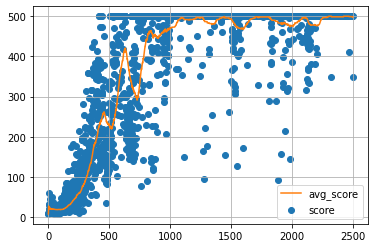

In [ ]:
x = [i+1 for i in range(len(scores))]
avg_scores = []
for i in range(len(scores)):
    avg_scores.append(np.mean(scores[max(0, i - 99):i+1]))
plt.scatter(x, scores, color='C0', label='score')
plt.plot(x, avg_scores, color='C1', label='avg_score')
plt.legend()
plt.grid()
plt.show()

In [ ]:
%%time
env = gym.make('CartPole-v1')
total = 0
for i in range(100):
    done = False
    obs = env.reset()
    score = 0
    while not done:
        action = agent.choose_action(obs)
        obs, reward, done, info = env.step(action)
        score += reward
    total += score
print("Average score=%.3f" % (total/100))

Average score=471.230
CPU times: user 31 s, sys: 210 ms, total: 31.2 s
Wall time: 31.1 s


# Домашние задания


## Базовый

Повторите улучшенный вариант Deep Q Learning с более сложной нейронной сетью (можно увеличить число слоев и/или число нейронов). Сравните результаты.

## Основной
Повторите вариант Policy Gradient с более сложной нейронной сетью (можно увеличить число слоев и/или число нейронов). Сравните результаты.

## Продвинутый

Примените метод Deep Q Learning к задаче [LunarLander-v2](https://gym.openai.com/envs/LunarLander-v2/)

Задача считается решенной (посадка успешна) если набрано 200 баллов.

РЕШЕНИЕ:

Можно взять без изменений классы ReplayBuffer, DeepQNetwork, DQNAgent. Изменим лишь их параметры.

In [ ]:
!pip install stable-baselines==2.5.1 box2d

     |████████████████████████████████| 245kB 25.0MB/s 
     |████████████████████████████████| 1.3MB 45.3MB/s 
     |████████████████████████████████| 1.4MB 53.9MB/s 
  Created wheel for zmq: filename=zmq-0.0.0-cp37-none-any.whl size=1277 sha256=f721411e5e71d8ed3bad65419eb3d15a5601c3a2bf0ff3917c5b2c586962de88
  Stored in directory: /root/.cache/pip/wheels/44/7a/7d/ac1d865766b06f9769ac1154bf31dbb5abb3b52ecfe278247a
  Created wheel for mpi4py: filename=mpi4py-3.0.3-cp37-cp37m-linux_x86_64.whl size=2065219 sha256=0d1f01b1de7699d33aec186c1e2ef317d282f606afb91057167242f890bd89b2
  Stored in directory: /root/.cache/pip/wheels/18/e0/86/2b713dd512199096012ceca61429e12b960888de59818871d6
Successfully built zmq mpi4py


In [ ]:
%%time
env = gym.make('LunarLander-v2')
n_games = 2200
scores = []
eps_history = []
path = ''

agent = DQNAgent(gamma=0.99, epsilon=1., eps_dec=3e-6, lr=0.0001, input_dims=env.observation_space.shape,
                n_actions=env.action_space.n, mem_size=10000, batch_size=32, env_name='LunarLander-v2', algo='DQNAgent')

for i in range(n_games):
    score = 0
    done = False
    obs = env.reset()

    while not done:
        # env.render()
        action = agent.choose_action(obs)
        obs_, reward, done, info = env.step(action)
        score += reward
        agent.store_transition(obs, action, reward, obs_, int(done))
        agent.learn()
        obs = obs_
    scores.append(score)
    eps_history.append(agent.epsilon)

    if (i + 1) % 100 == 0:
        avg_score = np.mean(scores[-100:])
        print('episode ', i + 1, 'score %.1f avg score %.1f epsilon %.2f' %
                (score, avg_score, agent.epsilon))
    with open(path + 'history.csv','a') as h:   
        h.write("%d,%.2f\n" % (i + 1, score)) 

episode  100 score -77.6 avg score -167.4 epsilon 0.97
episode  200 score -101.7 avg score -162.4 epsilon 0.94
episode  300 score -56.9 avg score -160.5 epsilon 0.91
episode  400 score -46.7 avg score -153.2 epsilon 0.88
episode  500 score -76.1 avg score -139.0 epsilon 0.85
episode  600 score -191.6 avg score -147.9 epsilon 0.82
episode  700 score -213.4 avg score -136.5 epsilon 0.79
episode  800 score -70.4 avg score -125.0 epsilon 0.76
episode  900 score -187.3 avg score -113.6 epsilon 0.72
episode  1000 score -69.9 avg score -103.7 epsilon 0.68
episode  1100 score -98.0 avg score -79.3 epsilon 0.64
episode  1200 score -156.8 avg score -87.5 epsilon 0.59
episode  1300 score -173.2 avg score -101.4 epsilon 0.53
episode  1400 score -155.5 avg score -67.8 epsilon 0.42
episode  1500 score 2.4 avg score 25.8 epsilon 0.20
episode  1600 score -52.3 avg score 57.8 epsilon 0.01
episode  1700 score -56.1 avg score 25.9 epsilon 0.01
episode  1800 score 90.8 avg score 107.8 epsilon 0.01
episode

Построим график обучения

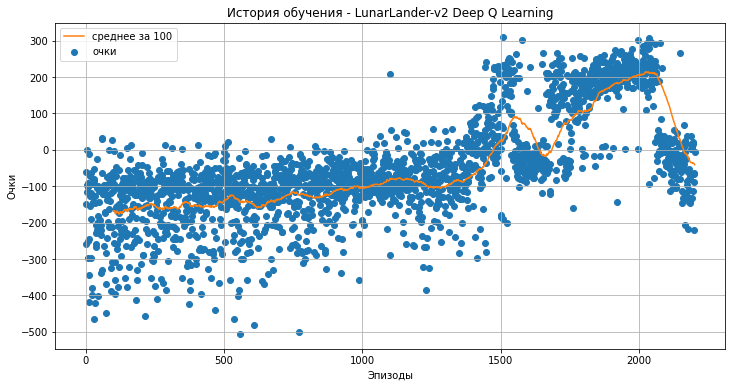

In [ ]:
df = pd.read_csv(path + 'history.csv', header=None, names=('episode', 'score'))
x = df.episode
y = df.score
y1 = np.zeros_like(y)
for i in range(len(x)):
    y1[i] = np.mean(y[i-100:i])
plt.figure(figsize=(12,6))
plt.scatter(x, y, label='очки')
plt.plot(x, y1, color='C1', label='среднее за 100')
plt.ylabel('Очки')
plt.xlabel('Эпизоды')
plt.legend()
plt.grid()
plt.title('История обучения - LunarLander-v2 Deep Q Learning')
plt.show()

Получим средний результат за 100 попыток посадки:

In [ ]:
%%time
env = gym.make('LunarLander-v2')
episodes = 100
total = 0.
for ep in range(episodes):
    score = 0.
    obs = env.reset()
    done = False
    while not done:
        action = agent.choose_action(obs)
        obs, reward, done, _ = env.step(action)
        score += reward
    if (ep + 1) % 10 == 0:
        print("episode: %d Score: %1.f" % (ep + 1, score))
    total += score
print("Average score %.2f" % (total/episodes))

episode: 10 Score: -219
episode: 20 Score: -98
episode: 30 Score: -3
episode: 40 Score: -137
episode: 50 Score: -140
episode: 60 Score: 37
episode: 70 Score: 7
episode: 80 Score: -79
episode: 90 Score: -7
episode: 100 Score: -73
Average score -75.55
CPU times: user 5.74 s, sys: 9.31 ms, total: 5.75 s
Wall time: 5.74 s


## Профессиональный

Примените метод Policy Gradient к задаче [LunarLander-v2](https://gym.openai.com/envs/LunarLander-v2/)

РЕШЕНИЕ:

Воспользуемся готовыми классами, изменим лишь основной цикл обучения:

In [ ]:
path = '/content/drive/My Drive/weights/LunarLander/' # сохраняйте на Google-drive для длительного сохранения
path = '/content/' # Сохранение на диске виртуальной машины только на время сессии.

In [ ]:
%%time
env = gym.make('LunarLander-v2')
agent = PolicyGradientAgent(ALPHA=0.001, input_dims=env.observation_space.shape, GAMMA=0.99, layer1_size=128, n_actions=env.action_space.n)
scores = []
num_episodes = 2500
for i in range(num_episodes):
    done = False
    score = 0
    observation = env.reset()
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        agent.store_rewards(reward)
        observation = observation_
        score += reward
    scores.append(score)
    agent.learn()
    if (i + 1) % 100 == 0:
        avg_score = np.mean(scores[-100:])
        print('episode ', i + 1, 'score %.1f avg score %.1f' % (score, avg_score))
    with open(path + 'history.csv','a') as h:   
        h.write("%d,%.2f\n" % (i + 1, score)) 

episode  100 score -40.2 avg score -174.0
episode  200 score -2.4 avg score -146.9
episode  300 score -53.7 avg score -130.6
episode  400 score -43.6 avg score -92.0
episode  500 score -33.5 avg score -80.8
episode  600 score -18.8 avg score -71.7
episode  700 score -7.8 avg score -24.8
episode  800 score 46.3 avg score -1.0
episode  900 score -19.1 avg score 10.5
episode  1000 score -17.1 avg score 18.8
episode  1100 score 52.7 avg score 30.7
episode  1200 score 131.8 avg score 46.2
episode  1300 score 101.9 avg score 63.7
episode  1400 score 63.9 avg score 69.5
episode  1500 score 15.2 avg score 76.9
episode  1600 score 7.3 avg score 81.4
episode  1700 score 101.5 avg score 99.1
episode  1800 score -54.2 avg score 81.5
episode  1900 score 15.6 avg score 102.2
episode  2000 score 144.1 avg score 116.4
episode  2100 score 33.3 avg score 116.0
episode  2200 score 138.9 avg score 99.0
episode  2300 score 157.3 avg score 113.5
episode  2400 score 233.5 avg score 127.4


Выведем график обучения:

In [ ]:
df = pd.read_csv(path + 'history.csv', header=None, names=('episode', 'score'))
x = df.episode
y = df.score
y1 = np.zeros_like(y)
for i in range(len(x)):
    y1[i] = np.mean(y[i-100:i])
plt.figure(figsize=(12,6))
plt.scatter(x, y, label='очки')
plt.plot(x, y1, color='C1', label='среднее за 100')
plt.ylabel('Очки')
plt.xlabel('Эпизоды')
plt.legend()
plt.grid()
plt.title('История обучения - LunarLander-v2 Policy Gradient')
plt.show()

Так можно сохранить обученную модель агента для последующей загрузки:

In [ ]:
print('... saving checkpoint ...')
T.save(agent.policy.state_dict(), path + 'Tmodel')

А так - воссоздать модель и восстановить веса.

In [ ]:
agent = PolicyGradientAgent(ALPHA=0.001, input_dims=[8], GAMMA=0.99, n_actions=4, layer1_size=128)
print('... loading checkpoint ...')
agent.policy.load_state_dict(T.load(path + 'Tmodel'))

Посмотрим среднее число удачных посадок:

In [ ]:
%%time
env = gym.make('LunarLander-v2')
episodes = 100
total = 0.
for ep in range(episodes):
    score = 0.
    obs = env.reset()
    done = False
    while not done:
        action = agent.choose_action(obs)
        obs, reward, done, _ = env.step(action)
        score += reward
    if (ep + 1) % 10 == 0:
        print("episode: %d Score: %1.f" % (ep+1, score))
    total += score
print("Average score %.2f" % (total/episodes))

Для воспроизведения видео нам понадобится установить доп. пакеты:

In [ ]:
!pip install pyvirtualdisplay 
!pip install xvfbwrapper 
!apt-get update 
!apt-get install xvfb

In [ ]:
import glob 
import io 
import base64 
from IPython.display import HTML 
import time 
from IPython import display as ipythondisplay 
from pyvirtualdisplay import Display 
from gym import logger as gymlogger 
from gym.wrappers import Monitor 
gymlogger.set_level(40)

Функции для вывода видео и обертка для перехвата изображения.

In [ ]:
display = Display(visible=0, size=(1400, 900))
display.start()

def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")
    
def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env

In [ ]:
env = gym.make('LunarLander-v2')
env.seed(42)
env = wrap_env(env)
obs = env.reset()
done = False
score = 0.
while not done:
    env.render()
    action = agent.choose_action(obs)
    obs, reward, done, _ = env.step(action)
    score += reward
env.close()
print("Score=%.2f" % score)
show_video()

#Литература

1. https://habr.com/ru/company/piter/blog/434738/

2. https://datascience.org.ua/vvedenie-v-reinforcement-learning-ili-obuchenie-s-podkrepleniem/

3. https://www.youtube.com/watch?v=ZhsEKTo7V04

4. http://www.machinelearning.ru/wiki/index.php?title=%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81_%D0%BF%D0%BE%D0%B4%D0%BA%D1%80%D0%B5%D0%BF%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC

5. https://en.wikipedia.org/wiki/Multi-armed_bandit

6. https://en.wikipedia.org/wiki/Temporal_difference_learning

7. https://habr.com/ru/post/308094/

8. https://habr.com/ru/company/piter/blog/434738/

9. https://www.youtube.com/watch?v=iEUrX_eEWNY

10. https://www.researchgate.net/figure/Agent-environment-interaction-left-action-and-reward-sequences-right_fig1_349630400

#End